# Quick Sort - Programação Paralela e Distribuída

## Integrantes do grupo :
Yago David Pimenta - 800273

Matheus Menecucci - 800310

Pedro Henrique Borges - 804071

Heitor Colichio - 800423

Luiz Gustavo - 800225


# Algoritmos e estratégias de decomposição para o QuickSort


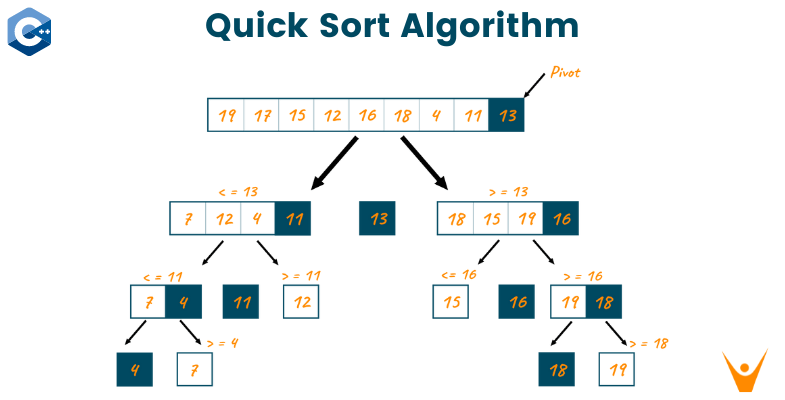

* O ***QuickSort*** é um algoritmo de ordenação eficiente baseado na estratégia de
"dividir para conquistar". Ele funciona selecionando um elemento como pivô e particionando o array em duas partes, de modo que elementos menores que o pivô estejam à esquerda e elementos maiores estejam à direita. Esse processo é aplicado recursivamente nas subpartes até que todo o array esteja ordenado.
O QuickSort é eficiente na prática e tem uma performance média de O(n log n), mas pode degradar para O(n^2) em casos extremos.

---

#   **Estratégias:**

* **1) Escolha Aleatória do Pivô**: Ela ajuda a evitar cenários desfavoráveis quando
o array já está parcialmente ordenado. A função escolherPivoAleatorio gera um índice aleatório entre o início e o fim, trocando-o com o último elemento antes do particionamento.

* **Prós:**
* Redução da Probabilidade de Desempenho Ruim:
A escolha aleatória do pivô reduz a probabilidade de desempenho ruim em arrays quase ordenados, pois o pivô é escolhido de forma imprevisível.
* Resistência a Entradas Maliciosas:
A aleatoriedade na escolha do pivô torna o algoritmo mais resistente a manipulações maliciosas por parte do usuário.
* Adaptabilidade a Diferentes Cenários:
A estratégia aleatória torna o algoritmo mais adaptável a diferentes tipos de dados, especialmente em situações em que a natureza dos dados é desconhecida.
* **Contras:**
* Complexidade Adicional:
Introduz complexidade adicional devido à geração de números aleatórios, o que pode aumentar o custo computacional.
* Dificuldade de Reprodução:
A aleatoriedade torna os resultados menos determinísticos e pode dificultar a reprodução exata do comportamento do algoritmo para fins de depuração ou análise.



* **2) Pivô Mediano de Três**: Outra abordagem é escolher o pivô como o valor mediano entre o primeiro, o meio e o último elemento do array. Isso ajuda a mitigar problemas quando o array está quase ordenado.

* **Prós:**
* Mitigação de Problemas em Arrays Parcialmente Ordenados:
A escolha do pivô como mediano de três ajuda a mitigar problemas de desempenho em arrays quase ordenados, melhorando o comportamento do QuickSort nesses casos.
* Melhor Desempenho em Alguns Cenários:
Em situações específicas, o uso do pivô mediano de três pode levar a uma melhoria no desempenho médio, especialmente quando comparado à escolha do pivô como elemento do meio.
* **Contras:**
* Complexidade Adicional:
Introduz complexidade adicional devido à lógica para encontrar o mediano de três elementos, o que pode ter um impacto mínimo no desempenho.
* Não Elimina Todos os Cenários de Desempenho Ruim:
Embora melhore o desempenho em alguns casos, a estratégia do pivô mediano de três não elimina completamente todos os cenários em que o QuickSort pode degradar para O(n²).
* Dependência da Escolha dos Três Elementos:
A eficácia dessa estratégia depende da escolha dos três elementos para calcular o mediano, o que pode ser um desafio em alguns casos.


* **3) Particionamento**: O particionamento é a etapa onde os elementos são rearranjados com base no pivô. O método de Hoare é comumente utilizado, onde dois índices se movem em direção um ao outro, trocando elementos fora de posição até que eles se cruzem. O QuickSort, com sua estratégia de particionamento, é mais adequado para situações em que arrays desordenados são comuns e a escolha do pivô é feita considerando possíveis casos adversos.

* **Prós:**
* Eficiência em Arrays Desordenados:
O particionamento é eficiente em arrays desordenados, pois separa os elementos menores e maiores em cada iteração, contribuindo para a convergência rápida do algoritmo.
* Simplicidade Conceitual:
O conceito de particionamento é simples e fácil de entender, o que facilita a implementação e depuração do algoritmo.
* In-Place Sorting:
A estratégia de particionamento permite a ordenação "in-place", o que significa que a reorganização ocorre diretamente no array de entrada, sem a necessidade de espaço adicional.
* **Contras:**
* Vulnerabilidade a Dados Pré-Ordenados:
Em arrays pré-ordenados ou quase ordenados, o particionamento pode não ser tão eficiente, levando a um desempenho pior do que algoritmos de ordenação estáveis, como o Merge Sort.
Possibilidade de Degradar para O(n²):


---


**Obs:** Em casos extremos, se a escolha do pivô não for otimizada, o QuickSort pode degradar para uma complexidade de tempo quadrático (O(n²)), especialmente quando o array já está parcialmente ordenado.
Então, a eficácia do particionamento depende significativamente da escolha inteligente do pivô. Se o pivô for mal escolhido, o desempenho geral do algoritmo pode ser afetado negativamente.
Lembrando que o QuickSort não é um algoritmo tão estável, o que significa que não preserva a ordem relativa de elementos iguais.
Na otimização de pilha, a implementação do padrão do QuickSort usando recursividade pode levar a estouro de pilha em casos extremos. Uma alternativa é utilizar uma pilha explícita ou implementar uma versão iterativa do algoritmo.

---

### Enunciado do problema :

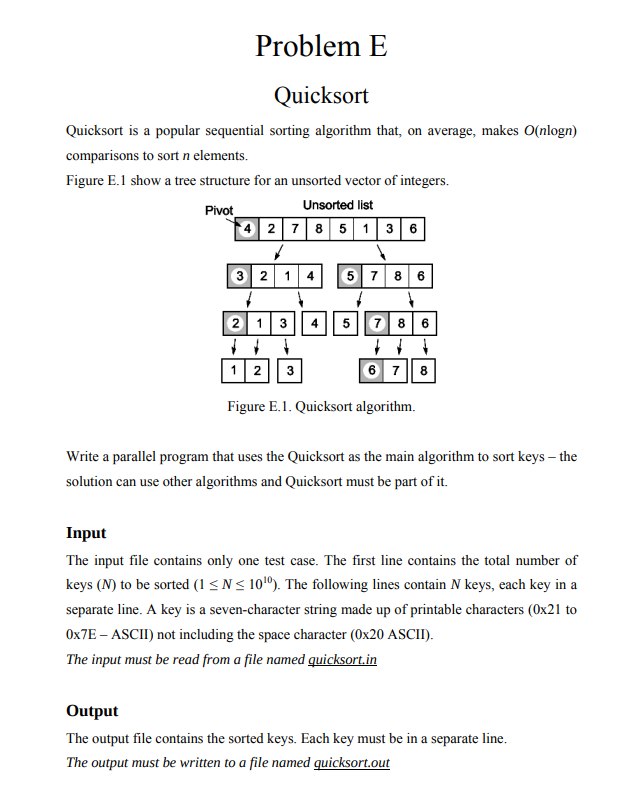

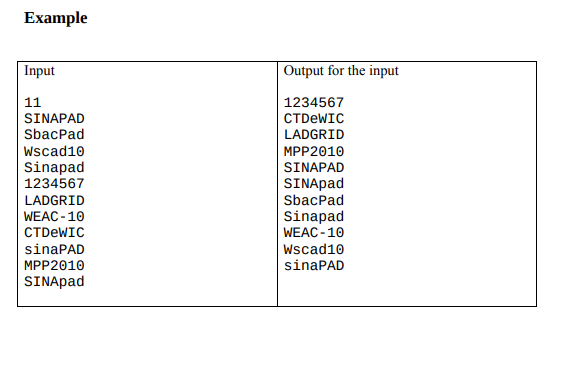

- #  Código do QuickSort

```c
/* Copyright (C) 1991-2022 Free Software Foundation, Inc.
   This file is part of the GNU C Library.
   The GNU C Library is free software; you can redistribute it and/or
   modify it under the terms of the GNU Lesser General Public
   License as published by the Free Software Foundation; either
   version 2.1 of the License, or (at your option) any later version.
   The GNU C Library is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU
   Lesser General Public License for more details.
   You should have received a copy of the GNU Lesser General Public
   License along with the GNU C Library; if not, see
   <https://www.gnu.org/licenses/>.  */
/* If you consider tuning this algorithm, you should consult first:
   Engineering a sort function; Jon Bentley and M. Douglas McIlroy;
   Software - Practice and Experience; Vol. 23 (11), 1249-1265, 1993.  */
#include <alloca.h>
#include <limits.h>
#include <stdlib.h>
#include <string.h>
/* Byte-wise swap two items of size SIZE. */
#define SWAP(a, b, size)						      \
  do									      \
    {									      \
      size_t __size = (size);						      \
      char *__a = (a), *__b = (b);					      \
      do								      \
	{								      \
	  char __tmp = *__a;						      \
	  *__a++ = *__b;						      \
	  *__b++ = __tmp;						      \
	} while (--__size > 0);						      \
    } while (0)
/* Discontinue quicksort algorithm when partition gets below this size.
   This particular magic number was chosen to work best on a Sun 4/260. */
#define MAX_THRESH 4
/* Stack node declarations used to store unfulfilled partition obligations. */
typedef struct
  {
    char *lo;
    char *hi;
  } stack_node;
/* The next 4 #defines implement a very fast in-line stack abstraction. */
/* The stack needs log (total_elements) entries (we could even subtract
   log(MAX_THRESH)).  Since total_elements has type size_t, we get as
   upper bound for log (total_elements):
   bits per byte (CHAR_BIT) * sizeof(size_t).  */
#define STACK_SIZE	(CHAR_BIT * sizeof (size_t))
#define PUSH(low, high)	((void) ((top->lo = (low)), (top->hi = (high)), ++top))
#define	POP(low, high)	((void) (--top, (low = top->lo), (high = top->hi)))
#define	STACK_NOT_EMPTY	(stack < top)
/* Order size using quicksort.  This implementation incorporates
   four optimizations discussed in Sedgewick:
   1. Non-recursive, using an explicit stack of pointer that store the
      next array partition to sort.  To save time, this maximum amount
      of space required to store an array of SIZE_MAX is allocated on the
      stack.  Assuming a 32-bit (64 bit) integer for size_t, this needs
      only 32 * sizeof(stack_node) == 256 bytes (for 64 bit: 1024 bytes).
      Pretty cheap, actually.
   2. Chose the pivot element using a median-of-three decision tree.
      This reduces the probability of selecting a bad pivot value and
      eliminates certain extraneous comparisons.
   3. Only quicksorts TOTAL_ELEMS / MAX_THRESH partitions, leaving
      insertion sort to order the MAX_THRESH items within each partition.
      This is a big win, since insertion sort is faster for small, mostly
      sorted array segments.
   4. The larger of the two sub-partitions is always pushed onto the
      stack first, with the algorithm then concentrating on the
      smaller partition.  This *guarantees* no more than log (total_elems)
      stack size is needed (actually O(1) in this case)!  */
void
_quicksort (void *const pbase, size_t total_elems, size_t size,
	    __compar_d_fn_t cmp, void *arg)
{
  char *base_ptr = (char *) pbase;
  const size_t max_thresh = MAX_THRESH * size;
  if (total_elems == 0)
    /* Avoid lossage with unsigned arithmetic below.  */
    return;
  if (total_elems > MAX_THRESH)
    {
      char *lo = base_ptr;
      char *hi = &lo[size * (total_elems - 1)];
      stack_node stack[STACK_SIZE];
      stack_node *top = stack;
      PUSH (NULL, NULL);
      while (STACK_NOT_EMPTY)
        {
          char *left_ptr;
          char *right_ptr;
	  /* Select median value from among LO, MID, and HI. Rearrange
	     LO and HI so the three values are sorted. This lowers the
	     probability of picking a pathological pivot value and
	     skips a comparison for both the LEFT_PTR and RIGHT_PTR in
	     the while loops. */
	  char *mid = lo + size * ((hi - lo) / size >> 1);
	  if ((*cmp) ((void *) mid, (void *) lo, arg) < 0)
	    SWAP (mid, lo, size);
	  if ((*cmp) ((void *) hi, (void *) mid, arg) < 0)
	    SWAP (mid, hi, size);
	  else
	    goto jump_over;
	  if ((*cmp) ((void *) mid, (void *) lo, arg) < 0)
	    SWAP (mid, lo, size);
	jump_over:;
	  left_ptr  = lo + size;
	  right_ptr = hi - size;
	  /* Here's the famous ``collapse the walls'' section of quicksort.
	     Gotta like those tight inner loops!  They are the main reason
	     that this algorithm runs much faster than others. */
	  do
	    {
	      while ((*cmp) ((void *) left_ptr, (void *) mid, arg) < 0)
		left_ptr += size;
	      while ((*cmp) ((void *) mid, (void *) right_ptr, arg) < 0)
		right_ptr -= size;
	      if (left_ptr < right_ptr)
		{
		  SWAP (left_ptr, right_ptr, size);
		  if (mid == left_ptr)
		    mid = right_ptr;
		  else if (mid == right_ptr)
		    mid = left_ptr;
		  left_ptr += size;
		  right_ptr -= size;
		}
	      else if (left_ptr == right_ptr)
		{
		  left_ptr += size;
		  right_ptr -= size;
		  break;
		}
	    }
	  while (left_ptr <= right_ptr);
          /* Set up pointers for next iteration.  First determine whether
             left and right partitions are below the threshold size.  If so,
             ignore one or both.  Otherwise, push the larger partition's
             bounds on the stack and continue sorting the smaller one. */
          if ((size_t) (right_ptr - lo) <= max_thresh)
            {
              if ((size_t) (hi - left_ptr) <= max_thresh)
		/* Ignore both small partitions. */
                POP (lo, hi);
              else
		/* Ignore small left partition. */
                lo = left_ptr;
            }
          else if ((size_t) (hi - left_ptr) <= max_thresh)
	    /* Ignore small right partition. */
            hi = right_ptr;
          else if ((right_ptr - lo) > (hi - left_ptr))
            {
	      /* Push larger left partition indices. */
              PUSH (lo, right_ptr);
              lo = left_ptr;
            }
          else
            {
	      /* Push larger right partition indices. */
              PUSH (left_ptr, hi);
              hi = right_ptr;
            }
        }
    }
  /* Once the BASE_PTR array is partially sorted by quicksort the rest
     is completely sorted using insertion sort, since this is efficient
     for partitions below MAX_THRESH size. BASE_PTR points to the beginning
     of the array to sort, and END_PTR points at the very last element in
     the array (*not* one beyond it!). */
#define min(x, y) ((x) < (y) ? (x) : (y))
  {
    char *const end_ptr = &base_ptr[size * (total_elems - 1)];
    char *tmp_ptr = base_ptr;
    char *thresh = min(end_ptr, base_ptr + max_thresh);
    char *run_ptr;
    /* Find smallest element in first threshold and place it at the
       array's beginning.  This is the smallest array element,
       and the operation speeds up insertion sort's inner loop. */
    for (run_ptr = tmp_ptr + size; run_ptr <= thresh; run_ptr += size)
      if ((*cmp) ((void *) run_ptr, (void *) tmp_ptr, arg) < 0)
        tmp_ptr = run_ptr;
    if (tmp_ptr != base_ptr)
      SWAP (tmp_ptr, base_ptr, size);
    /* Insertion sort, running from left-hand-side up to right-hand-side.  */
    run_ptr = base_ptr + size;
    while ((run_ptr += size) <= end_ptr)
      {
	tmp_ptr = run_ptr - size;
	while ((*cmp) ((void *) run_ptr, (void *) tmp_ptr, arg) < 0)
	  tmp_ptr -= size;
	tmp_ptr += size;
        if (tmp_ptr != run_ptr)
          {
            char *trav;
	    trav = run_ptr + size;
	    while (--trav >= run_ptr)
              {
                char c = *trav;
                char *hi, *lo;
                for (hi = lo = trav; (lo -= size) >= tmp_ptr; hi = lo)
                  *hi = *lo;
                *hi = c;
              }
          }
      }
  }
}

```

---

# Estruturas e partes importantes do Código:

- **Macro SWAP***: Existe uma macro chamada SWAP que realiza uma troca de bytes de dois itens de um tamanho fornecido.

- **Estrutura stack_node***: Essa estrutura é usada para armazenar informações sobre obrigações de partição não atendidas. Ela contém ponteiros (lo e hi) que representam os limites inferior e superior de uma partição.

- **Função quicksort***: A principal função de ordenação rápida é chamada _quicksort. Ela recebe o ponteiro base para o array a ser ordenado, o número total de elementos, o tamanho de cada elemento, uma função de comparação (cmp) e um argumento adicional (arg) para a função de comparação.

- **Implementação de Pilha***: O código usa uma implementação simples de pilha (um array de estruturas stack_node) para acompanhar partições não ordenadas. A pilha é usada para lidar com a recursão de uma maneira não recursiva.

- **Seleção de Pivô Médio de Três***: O código usa uma árvore de decisão de pivô médio de três para selecionar o elemento pivô, o que ajuda a reduzir a probabilidade de selecionar um valor pivô ruim.

- **Particionamento e Ordenação***: O array é particionado e ordenado usando uma combinação de quicksort e ordenação por inserção. O quicksort é aplicado recursivamente até que o tamanho da partição seja pequeno o suficiente, e então a ordenação por inserção é usada para ordenar eficientemente os elementos restantes.

- ***Observação***: Essa implementação demonstra uma combinação de quicksort e ordenação por inserção, juntamente com otimizações para melhorar o desempenho.










#### Criando um arquivo.in para testar


In [ ]:
!echo -e "11\nSINAPAD\nSbacPad\nWscad10\nSinapad\n1234567\nLADGRID\nWEAC-10\nCTDeWIC\nsinaPAD\nMPP2010\nSINApad" > quicksort.in

### Sequencial

In [ ]:
%%writefile sequencial.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

int main(void) {
	char *keys;
	long int N, i;

	FILE *file;

	//Tenta abrir o arquivo chamado "quicksort.in" para leitura
	if ((file = fopen("quicksort.in", "r")) == NULL) {
		perror("quicksort.in");
		exit(1);
	}

	//Lê o valor de N do arquivo.
	fscanf(file, "%ld", &N);

	//Aloca dinamicamente memória para armazenar as strings. Cada string tem um tamanho fixo de 8 caractere
	keys = (char*) malloc(N * 8);
	if (keys == NULL) {
		perror("Memory allocation");
		exit(EXIT_FAILURE);
	}

	//Lê as strings do arquivo e as armazena no bloco de memória alocado para keys
	for (i = 0; i < N; i++)
		fscanf(file, "%s", keys + (i * 8));
	fclose(file);

	//Ordena as strings usando a função qsort
	qsort(keys, N, 8, (int(*)(const void *, const void *)) strcmp);

	if ((file = fopen("quicksort.out", "w")) == NULL) {
		perror("quicksort.out");
		exit(1);
	}

	for (i = 0; i < N; i++)
		fprintf(file, "%s\n", keys + (i * 8));

	fclose(file);
	free(keys);

	return EXIT_SUCCESS;
}

Writing sequencial.c


In [ ]:
!gcc sequencial.c -o sequencial
!./sequencial

In [ ]:
#Testando para ver se deu certo
!echo "Antes da ordenação"
!head -n 10 quicksort.in
!echo "Depois da ordenação"
!head -n 10 quicksort.out

Antes da ordenação
11
SINAPAD
SbacPad
Wscad10
Sinapad
1234567
LADGRID
WEAC-10
CTDeWIC
sinaPAD
Depois da ordenação
1234567
CTDeWIC
LADGRID
MPP2010
SINAPAD
SINApad
SbacPad
Sinapad
WEAC-10
Wscad10


Ou seja a versão sequencial está funcionando , agora vamos entender maneiras de paralelizar

#### ⏩ Aprofundando na função qsort :

A função qsort é uma função da biblioteca stdlib que é usada para ordenar arrays de elementos.

```c
void qsort(
   void *base,
   size_t number,
   size_t width,
   int (__cdecl *compare )(const void *, const void *)
);
```

**Parâmetros**

base :
Início da matriz de destino.

number :
Tamanho da matriz nos elementos.

width :
Tamanho do elemento em bytes.

compare :
Ponteiro para uma rotina fornecida pelo usuário que compara dois elementos de matriz e retorna um valor que especifica seu relacionamento.

A função qsort implementa um algoritmo de classificação rápida para classificar uma matriz de elementos number, cada uma de bytes width. O argumento base é um ponteiro para a base da matriz a ser classificada. qsort substitui essa matriz usando os elementos classificados.

qsort chama a rotina compare uma ou mais vezes durante a classificação e passa ponteiros para dois elementos de matriz em cada chamada. Se compare indicar que dois elementos são iguais, a ordem deles na matriz classificada resultante não será especificada.

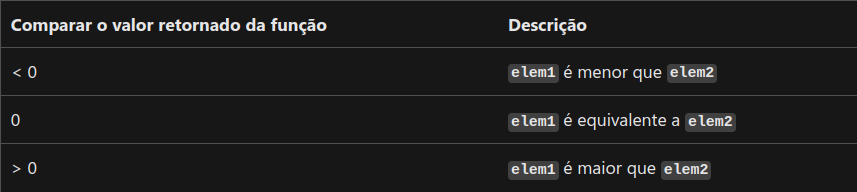

```c
qsort(keys, N, 8, (int(*)(const void *, const void *)) strcmp);

```

keys: Ponteiro para o array de strings a ser ordenado.

N: Número de strings no array.

8: Tamanho de cada string (presumindo que cada string tem 8 bytes).

(int(*)(const void *, const void *)) strcmp: Função de comparação. Neste caso, a função strcmp é usada para comparar duas strings.


**strcmp**



Função da lib string.h que tem como objetivo comparar duas strings , obedecendo o comportamento previsto pelo parâmetro compare .

**Medindo tempo da versão sequencial**

In [ ]:
!time ./sequencial


real	0m0.004s
user	0m0.000s
sys	0m0.001s


Como o número de entradas é muito pequeno irei tentar fazer um maior

In [ ]:
import random
import string

def generate_random_strings(n, length):
    characters = string.ascii_letters + string.digits
    random_strings = [''.join(random.choice(characters) for _ in range(length)) for _ in range(n)]
    return random_strings

def write_strings_to_file(strings, filename):
    with open(filename, 'w') as file:
        # Escreve o número de strings na primeira linha
        file.write(str(len(strings)) + '\n')

        # Escreve as strings nas linhas subsequentes
        for string in strings:
            file.write(string + '\n')

if __name__ == "__main__":
    num_strings = 10000000
    string_length = 7
    output_file = "quicksort.in"

    random_strings = generate_random_strings(num_strings, string_length)
    write_strings_to_file(random_strings, output_file)

    print(f"{num_strings} strings aleatórias geradas e salvas em {output_file}")



10000000 strings aleatórias geradas e salvas em quicksort.in


In [ ]:
!gcc sequencial.c -o sequencial
!time ./sequencial


real	0m5.059s
user	0m4.693s
sys	0m0.227s


### OpenMP

In [ ]:
#Entendo as características do hardware
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.30GHz
    CPU family:          6
    Model:               63
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4599.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp

Como orientado pelo professor , iremos adaptar algumas coisas no código pronto do qsort , a fim de obtermos o melhor mecanismo de ordenação possível .

**Elaborando a estratégia** :
- Vamos compreender a maneira que deve ser o particionamento desse algoritmo
- Como realizar o merge da forma apropriada
- Utilizar diretiva #pragma omp single para a chamada da função na main
- Criação de task para realizar o trabalho da função
- Impor um limite na criação de task

**Função Merge:**
- A função merge é responsável por mesclar duas partes ordenadas de um array.
- Ela recebe um array arr, dois índices left e mid que definem a primeira parte, e um índice right que define o final da segunda parte.
- Cria dois arrays temporários leftArr e rightArr para armazenar temporariamente as partes a serem mescladas.
- Os elementos são copiados das partes correspondentes de arr para leftArr e rightArr.
- Em seguida, os elementos são comparados e mesclados em ordem crescente no array principal arr.

In [ ]:
%%writefile paralelo.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <omp.h>

#define MAX_STRING_SIZE 7
#define TASK_SIZE 100

//mesclagem para o algoritmo de ordenação
void merge(char **arr, int left, int mid, int right) {
    //tamanho das duas parte que vão ser ordenadas
    int n1 = mid - left + 1;
    int n2 = right - mid;

    char **leftArr = malloc(n1 * sizeof(char*));
    char **rightArr = malloc(n2 * sizeof(char*));

    //copiando os dados das duas partes a serem mescladas são copiados para os arrays temporários
    for (int i = 0; i < n1; i++)
        leftArr[i] = arr[left + i];
    for (int j = 0; j < n2; j++)
        rightArr[j] = arr[mid + 1 + j];

    //As partes ordenadas são mescladas comparando os elementos o array da direita com o da esquerda
    int i = 0, j = 0, k = left;
    while (i < n1 && j < n2) {
        if (strcmp(leftArr[i], rightArr[j]) <= 0) {
            arr[k++] = leftArr[i++];
        } else {
            arr[k++] = rightArr[j++];
        }
    }

    //Cada elemento restante em leftArr é copiado para a posição correspondente no array principal arr, e os índices i e k são incrementados.
    while (i < n1) {
        arr[k++] = leftArr[i++];
    }

    while (j < n2) {
        arr[k++] = rightArr[j++];
    }

    free(leftArr);
    free(rightArr);
}

void Qsort(char **arr, int left, int right) {
    //A função recursiva Qsort só é chamada se o índice left for menor que o índice right.
    //Isso evita chamadas desnecessárias quando a parte do array já está ordenada.
    if (left < right) {
        //calculando o meio
        int mid = left + (right - left) / 2;

        if (right - left + 1 <= TASK_SIZE) {
            // Caso base: chamada direta para poucos elementos
            merge(arr, left, mid, right);
        } else {
            // Caso recursivo: criação de tarefas
            #pragma omp task
            Qsort(arr, left, mid);

            #pragma omp task
            Qsort(arr, mid + 1, right);

            //sincronização das tarefas antes de chamar o merge
            #pragma omp taskwait
            merge(arr, left, mid, right);
        }
    }
}

int main() {
    FILE *file = fopen("quicksort.in", "r");
    if (!file) {
        perror("Error opening file");
        return 1;
    }

    int num_strings;
    fscanf(file, "%d", &num_strings);

    char **strings = malloc(num_strings * sizeof(char*));
    for (int i = 0; i < num_strings; i++) {
        strings[i] = malloc((MAX_STRING_SIZE + 1) * sizeof(char));
        fscanf(file, "%s", strings[i]);
        strings[i][MAX_STRING_SIZE] = '\0';  // terminando a string com nulo
    }

    fclose(file);


    //criança da região paralela e criando o time de threads.
    #pragma omp parallel
    {
      //assegurando que a chamada é feito por uma thread, evitando concorrência.
      #pragma omp single
      Qsort(strings, 0, num_strings - 1);

    }

    FILE *outputFile = fopen("quicksort.out", "w");
    if (!outputFile) {
        perror("Error opening output file");
        return 1;
    }

    for (int i = 0; i < num_strings; i++)
        fprintf(outputFile, "%s\n", strings[i]);

    fclose(outputFile);

    for (int i = 0; i < num_strings; i++)
        free(strings[i]);
    free(strings);

    return 0;
}


Overwriting paralelo.c


In [ ]:
!gcc paralelo.c -o paralelo -fopenmp
!time OMP_NUM_THREADS=1 ./paralelo


real	0m8.451s
user	0m7.584s
sys	0m0.675s


In [ ]:
!gcc paralelo.c -o paralelo -fopenmp
!time OMP_NUM_THREADS=2 ./paralelo


real	0m8.764s
user	0m9.130s
sys	0m0.699s


In [ ]:
!gcc paralelo.c -o paralelo -fopenmp
!time OMP_NUM_THREADS=8 ./paralelo


real	0m6.159s
user	0m6.016s
sys	0m0.778s


In [ ]:
!gcc paralelo.c -o paralelo -fopenmp
!time OMP_NUM_THREADS=32 ./paralelo


real	0m3.847s
user	0m4.580s
sys	0m0.571s


In [ ]:
!head -n 5 quicksort.in

10000000
K3nbkFt
rgGhhu9
UVG9wSl
hvdTz9q


In [ ]:
!head -n 5 quicksort.out

000XCCV
000ZzRN
000l1nh
001sfco
004Dgtw


**Resultados  para uma máquina local**

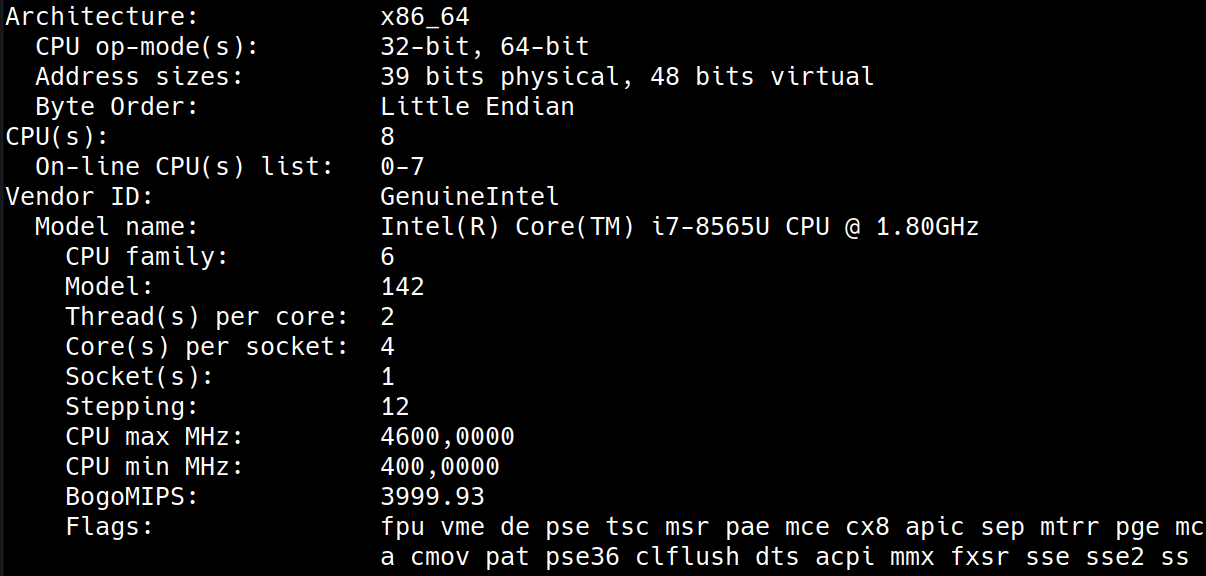

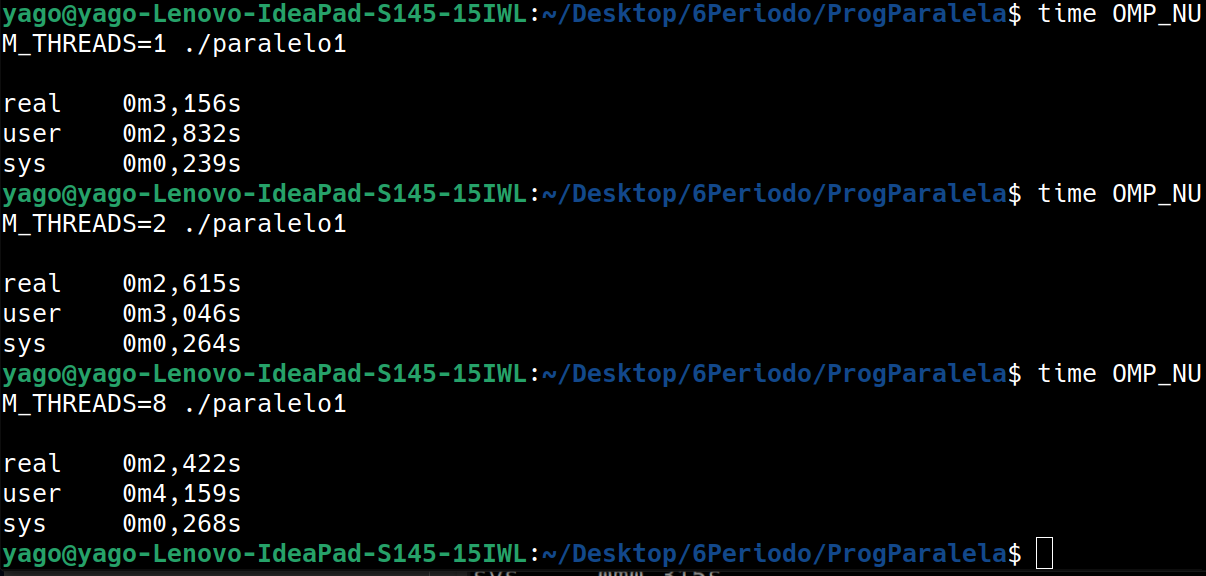![Screenshot from 2024-01-31 15-31-58.png](')

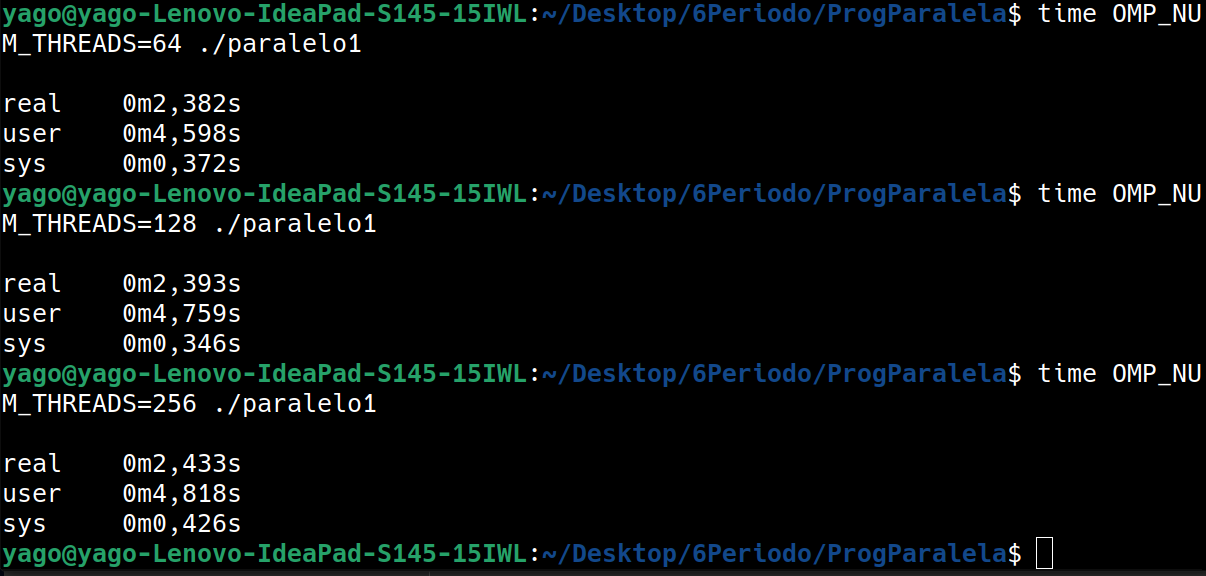

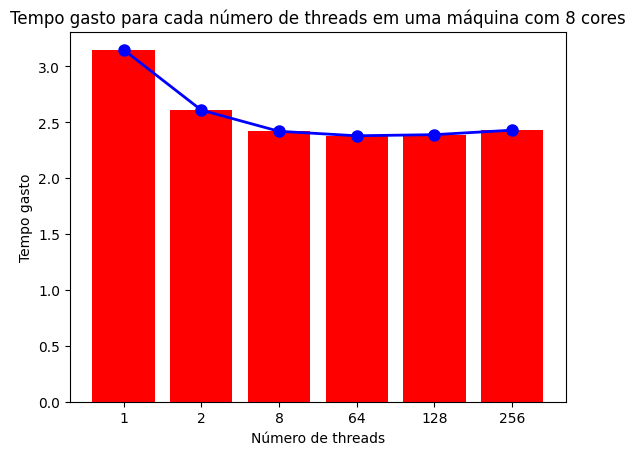

In [ ]:
import matplotlib.pyplot as plt
time = [3.15,2.61,2.42,2.38,2.39,2.43]
num_thread = ['1','2','8','64','128','256']
plt.bar(num_thread,time,color="red")
plt.plot(num_thread, time, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Número de threads")
plt.ylabel("Tempo gasto")

plt.title("Tempo gasto para cada número de threads em uma máquina com 8 cores")
plt.show()

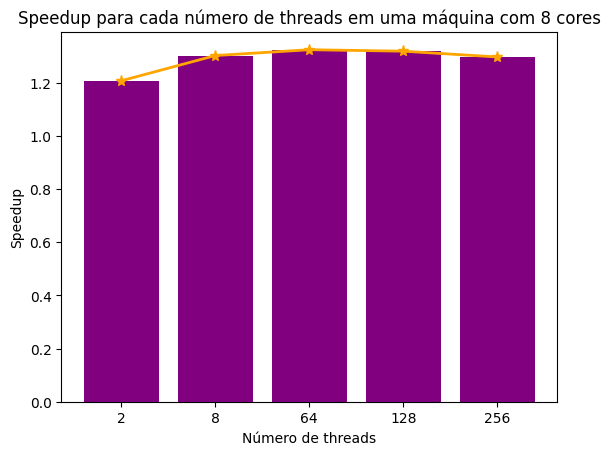

In [ ]:
speedup = [3.15/2.61,3.15/2.42,3.15/2.38,3.15/2.39,3.15/2.43]
#tempo(1)/tempo(n)
num_thread = ['2','8','64','128','256']
plt.bar(num_thread,speedup,color="purple")
plt.plot(num_thread, speedup, color='orange', marker='*', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Número de threads")
plt.ylabel("Speedup")

plt.title("Speedup para cada número de threads em uma máquina com 8 cores")
plt.show()

### CUDA

In [ ]:
# exibindo informações sobre as versões de compiladores disponíveis
! echo && nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!echo -e "11\nSINAPAD\nSbacPad\nWscad10\nSinapad\n1234567\nLADGRID\nWEAC-10\nCTDeWIC\nsinaPAD\nMPP2010\nSINApad" > quicksort.in

In [ ]:
%%writefile teste2.cu
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <cuda_runtime.h>
#include <cctype>
#define MAX_STRING_SIZE 8 // 7 caracteres + terminador nulo
#define SWAP(a, b, size)              \
    do                                \
    {                                 \
        size_t __size = (size);       \
        char *__a = (a), *__b = (b);   \
        do                            \
        {                            \
            char __tmp = *__a;        \
            *__a++ = *__b;            \
            *__b++ = __tmp;           \
        } while (--__size > 0);       \
    } while (0)


__device__ int compare(const char *str1, const char *str2, int size)
{
    for (int i = 0; i < size; ++i)
    {
        char c1 = str1[i];
        char c2 =str2[i];

        if (c1 < c2)
            return -1;
        else if (c1 > c2)
            return 1;
    }
    return 0;
}

__device__ void quicksort(char *data, int left, int right, int size)
{
    if (left >= right)
        return;

    char *lptr = data + left * size;
    char *rptr = data + right * size;
    char *pivot = data + ((left + right) / 2) * size;

    if (compare(pivot, lptr, size) < 0)
        SWAP(pivot, lptr, size);
    if (compare(rptr, pivot, size) < 0)
        SWAP(pivot, rptr, size);
    if (compare(pivot, lptr, size) < 0)
        SWAP(pivot, lptr, size);

    char *low = lptr + size;
    char *high = rptr - size;

    do
    {
        while (compare(low, pivot, size) < 0)
            low += size;
        while (compare(pivot, high, size) < 0)
            high -= size;
        if (low <= high)
        {
            SWAP(low, high, size);
            low += size;
            high -= size;
        }
    } while (low <= high);

    int nright = (high - data) / size;
    int nleft = (low - data) / size;

    quicksort(data, left, nright, size);
    quicksort(data, nleft, right, size);
}

__global__ void cuda_quicksort(char *data, int num_items, int size)
{
    quicksort(data, 0, num_items - 1, size);
}
__global__ void print_device_data(char *data, int num_items, int size)
{
    for (int i = 0; i < num_items; i++)
    {
        for (int j = 0; j < size; j++)
        {
            printf("%c", data[i * size + j]);
        }
        printf("\n");
    }
}
int main(void)
{
    int num_items = 0;
    char *h_data = NULL;
    char *d_data = NULL;

    FILE *file = fopen("quicksort.in", "r");
    if (!file)
    {
        perror("Error opening file");
        exit(EXIT_FAILURE);
    }

    fscanf(file, "%d", &num_items);

    h_data = (char *)malloc(num_items * MAX_STRING_SIZE);
    if (!h_data)
    {
        perror("Memory allocation error");
        fclose(file);
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fscanf(file, "%s", h_data + i * MAX_STRING_SIZE);

    fclose(file);

    printf("Dados de entrada:\n");
    for (int i = 0; i < num_items; i++)
        printf("%s\n", h_data + i * MAX_STRING_SIZE);
printf("O numerof total de palavras eh %d\n",num_items);

    cudaMalloc((void **)&d_data, num_items * MAX_STRING_SIZE);
    cudaMemcpy(d_data, h_data, num_items * MAX_STRING_SIZE, cudaMemcpyHostToDevice);


//print_device_data<<<1, 1>>>(d_data, num_items, MAX_STRING_SIZE);

    int threadsPerBlock = 1;
    int blocksPerGrid = (num_items + threadsPerBlock - 1) / threadsPerBlock;
    cuda_quicksort<<<blocksPerGrid, threadsPerBlock>>>(d_data, num_items, MAX_STRING_SIZE);

    cudaDeviceSynchronize();
//print_device_data<<<1, 1>>>(d_data, num_items, MAX_STRING_SIZE);
    printf("\nDados ordendos:\n");

    char *results_h = (char *)malloc(num_items * MAX_STRING_SIZE);
  cudaMemcpy(results_h, d_data, num_items * MAX_STRING_SIZE, cudaMemcpyDeviceToHost);

    //for (int i = 0; i < num_items; i++)
     //printf("%s\n", results_h + i * MAX_STRING_SIZE);

    FILE *out_file = fopen("quicksort.out", "w");
    if (!out_file)
    {
        perror("Error opening output file");
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fprintf(out_file, "%s\n", results_h + i * MAX_STRING_SIZE);


    // Cleanup
    free(h_data);
    free(results_h);
    cudaFree(d_data);
    cudaDeviceReset();
    exit(EXIT_SUCCESS);
}


Overwriting teste2.cu


In [ ]:
!nvcc teste2.cu -o teste2 -O3
! time ./teste2

teste2.cu(104): warning #1650-D: result of call is not used
      fscanf(file, "%d", &num_items);
      ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

teste2.cu(115): warning #1650-D: result of call is not used
          fscanf(file, "%s", h_data + i * 8);
          ^

teste2.cu(104): warning #1650-D: result of call is not used
      fscanf(file, "%d", &num_items);
      ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

teste2.cu(115): warning #1650-D: result of call is not used
          fscanf(file, "%s", h_data + i * 8);
          ^

ptxas warning : Stack size for entry function '_Z14cuda_quicksortPcii' cannot be statically determined
teste2.cu: In function ‘int main()’:
teste2.cu:104:7: warning: ignoring return value of ‘int fscanf(FILE*, const char*, ...)’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
  104 |   

In [ ]:
!head -n 5 quicksort.in

11
SINAPAD
SbacPad
Wscad10
Sinapad


In [ ]:
!head -n 5 quicksort.out

1234567
CTDeWIC
LADGRID
MPP2010
SINAPAD


Agora nosso intuito é expandir o número de strings e também alterar o número de
threads por bloco e também o número de blocos por grid .

In [ ]:
import random
import string

def generate_random_strings(n, length):
    characters = string.ascii_letters + string.digits
    random_strings = [''.join(random.choice(characters) for _ in range(length)) for _ in range(n)]
    return random_strings

def write_strings_to_file(strings, filename):
    with open(filename, 'w') as file:
        # Escreve o número de strings na primeira linha
        file.write(str(len(strings)) + '\n')

        # Escreve as strings nas linhas subsequentes
        for string in strings:
            file.write(string + '\n')

if __name__ == "__main__":
    num_strings = 10000000
    string_length = 7
    output_file = "quicksort.in"

    random_strings = generate_random_strings(num_strings, string_length)
    write_strings_to_file(random_strings, output_file)

    print(f"{num_strings} strings aleatórias geradas e salvas em {output_file}")


10000000 strings aleatórias geradas e salvas em quicksort.in


In [ ]:
%%writefile cuda.cu

#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <cuda_runtime.h>
#include <cctype>
#define MAX_STRING_SIZE 8 // 7 caracteres + terminador nulo
#define SWAP(a, b, size)              \
    do                                \
    {                                 \
        size_t __size = (size);       \
        char *__a = (a), *__b = (b);   \
        do                            \
        {                            \
            char __tmp = *__a;        \
            *__a++ = *__b;            \
            *__b++ = __tmp;           \
        } while (--__size > 0);       \
    } while (0)

__device__ int compare(const char *str1, const char *str2, int size)
{
    for (int i = 0; i < size; ++i)
    {
        char c1 = str1[i];
        char c2 =str2[i];

        if (c1 < c2)
            return -1;
        else if (c1 > c2)
            return 1;
    }
    return 0;
}

__device__ void quicksort(char *data, int left, int right, int size)
{
    if (left >= right)
        return;

    char *lptr = data + left * size;
    char *rptr = data + right * size;
    char *pivot = data + ((left + right) / 2) * size;

    if (compare(pivot, lptr, size) < 0)
        SWAP(pivot, lptr, size);
    if (compare(rptr, pivot, size) < 0)
        SWAP(pivot, rptr, size);
    if (compare(pivot, lptr, size) < 0)
        SWAP(pivot, lptr, size);

    char *low = lptr + size;
    char *high = rptr - size;

    do
    {
        while (compare(low, pivot, size) < 0)
            low += size;
        while (compare(pivot, high, size) < 0)
            high -= size;
        if (low <= high)
        {
            SWAP(low, high, size);
            low += size;
            high -= size;
        }
    } while (low <= high);

    int nright = (high - data) / size;
    int nleft = (low - data) / size;

    quicksort(data, left, nright, size);
    quicksort(data, nleft, right, size);
}

__global__ void cuda_quicksort(char *data, int num_items, int size)
{
    quicksort(data, 0, num_items - 1, size);
}
__global__ void print_device_data(char *data, int num_items, int size)
{
    for (int i = 0; i < num_items; i++)
    {
        for (int j = 0; j < size; j++)
        {
            printf("%c", data[i * size + j]);
        }
        printf("\n");
    }
}
int main(void)
{
    int num_items = 0;
    char *h_data = NULL;
    char *d_data = NULL;

    FILE *file = fopen("quicksort.in", "r");
    if (!file)
    {
        perror("Error opening file");
        exit(EXIT_FAILURE);
    }

    fscanf(file, "%d", &num_items);

    h_data = (char *)malloc(num_items * MAX_STRING_SIZE);
    if (!h_data)
    {
        perror("Memory allocation error");
        fclose(file);
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fscanf(file, "%s", h_data + i * MAX_STRING_SIZE);

    fclose(file);

   // printf("Dados de entrada:\n");
   // for (int i = 0; i < num_items; i++)
      //  printf("%s\n", h_data + i * MAX_STRING_SIZE);
printf("O numerof total de palavras eh %d\n",num_items);

    cudaMalloc((void **)&d_data, num_items * MAX_STRING_SIZE);
    cudaMemcpy(d_data, h_data, num_items * MAX_STRING_SIZE, cudaMemcpyHostToDevice);


//print_device_data<<<1, 1>>>(d_data, num_items, MAX_STRING_SIZE);

    int threadsPerBlock = 32;
    int blocksPerGrid = (num_items + threadsPerBlock - 1) / threadsPerBlock;
    cuda_quicksort<<<blocksPerGrid, threadsPerBlock>>>(d_data, num_items, MAX_STRING_SIZE);
    cudaDeviceSynchronize();
//print_device_data<<<1, 1>>>(d_data, num_items, MAX_STRING_SIZE);
   // printf("\nDados ordendos:\n");

    // Devolvendo os resultados para o HOST
    char *results_h = (char *)malloc(num_items * MAX_STRING_SIZE);
  cudaMemcpy(results_h, d_data, num_items * MAX_STRING_SIZE, cudaMemcpyDeviceToHost);

   // for (int i = 0; i < num_items; i++)
    // printf("%s\n", results_h + i * MAX_STRING_SIZE);

    // Escrevendo o quicksort.out
    FILE *out_file = fopen("quicksort.out", "w");
    if (!out_file)
    {
        perror("Error opening output file");
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fprintf(out_file, "%s\n", results_h + i * MAX_STRING_SIZE);

    fclose(out_file);


    free(h_data);
    free(results_h);
    cudaFree(d_data);
    cudaDeviceReset();
    exit(EXIT_SUCCESS);
}


Overwriting cuda.cu


In [ ]:
!nvcc cuda.cu -o cuda
! time ./cuda

ptxas warning : Stack size for entry function '_Z14cuda_quicksortPcii' cannot be statically determined
O numerof total de palavras eh 10000000

real	0m15.994s
user	0m15.486s
sys	0m0.337s


In [ ]:
!head -n 5 quicksort.in

10000000
lRfj27m
58B8Jwp
EPBDdot
WkrxK3r


In [ ]:
!head -n 5 quicksort.out

#### Elaborando uma nova estratégia de ordenação

In [ ]:
import random
import string

def generate_random_strings(n, length):
    characters = string.ascii_letters + string.digits
    random_strings = [''.join(random.choice(characters) for _ in range(length)) for _ in range(n)]
    return random_strings

def write_strings_to_file(strings, filename):
    with open(filename, 'w') as file:
        # Escreve o número de strings na primeira linha
        file.write(str(len(strings)) + '\n')

        # Escreve as strings nas linhas subsequentes
        for string in strings:
            file.write(string + '\n')

if __name__ == "__main__":
    num_strings = 10000
    string_length = 7
    output_file = "quicksort.in"

    random_strings = generate_random_strings(num_strings, string_length)
    write_strings_to_file(random_strings, output_file)

    print(f"{num_strings} strings aleatórias geradas e salvas em {output_file}")

10000 strings aleatórias geradas e salvas em quicksort.in


In [ ]:
ritefile sort1.cu
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <cuda_runtime.h>

#define MAX_STRING_SIZE 8 // 7 caracteres + terminador nulo


__device__ int compare(const char *str1, const char *str2, int size)
{
    for (int i = 0; i < size; ++i)
    {
        char c1 = str1[i];
        char c2 = str2[i];

        if (c1 < c2)
            return -1;
        else if (c1 > c2)
            return 1;
    }
    return 0;
}

__device__ void merge(char *data, char *temp, int left, int mid, int right, int size)
{
    int i = left;
    int j = mid + 1;
    int k = left;

    while (i <= mid && j <= right)
    {
        if (compare(data + i * size, data + j * size, size) <= 0)
        {
            memcpy(temp + k * size, data + i * size, size);
            i++;
        }
        else
        {
            memcpy(temp + k * size, data + j * size, size);
            j++;
        }
        k++;
    }

    while (i <= mid)
    {
        memcpy(temp + k * size, data + i * size, size);
        i++;
        k++;
    }

    while (j <= right)
    {
        memcpy(temp + k * size, data + j * size, size);
        j++;
        k++;
    }

    for (int x = left; x <= right; x++)
        memcpy(data + x * size, temp + x * size, size);
}

__device__ void parallel_sort(char *data, char *temp, int left, int right, int size)
{
    if (left < right)
    {
        int mid = left + (right - left) / 2;

        // Chamada recursiva para a metade esquerda
        parallel_sort(data, temp, left, mid, size);

        // Chamada recursiva para a metade direita
        parallel_sort(data, temp, mid + 1, right, size);

        // Mescla as duas metades ordenadas
        merge(data, temp, left, mid, right, size);
    }
}

__global__ void parallel_sort_launcher(char *data, char *temp, int left, int right, int size)
{
    parallel_sort(data, temp, left, right, size);
}

int main(void)
{
    int num_items = 0;
    char *h_data = NULL;
    char *d_data = NULL;
    char *d_temp = NULL;

    FILE *file = fopen("quicksort.in", "r");
    if (!file)
    {
        perror("Error opening file");
        exit(EXIT_FAILURE);
    }

    fscanf(file, "%d", &num_items);

    h_data = (char *)malloc(num_items * MAX_STRING_SIZE);
    if (!h_data)
    {
        perror("Memory allocation error");
        fclose(file);
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fscanf(file, "%s", h_data + i * MAX_STRING_SIZE);

    fclose(file);

    cudaMalloc((void **)&d_data, num_items * MAX_STRING_SIZE);
    cudaMalloc((void **)&d_temp, num_items * MAX_STRING_SIZE);

    cudaMemcpy(d_data, h_data, num_items * MAX_STRING_SIZE, cudaMemcpyHostToDevice);

    int threadsPerBlock = 256;
    int blocksPerGrid = (num_items + threadsPerBlock - 1) / threadsPerBlock;
    parallel_sort_launcher<<<blocksPerGrid, threadsPerBlock>>>(d_data, d_temp, 0, num_items - 1, MAX_STRING_SIZE);
    cudaDeviceSynchronize();

    char *results_h = (char *)malloc(num_items * MAX_STRING_SIZE);
    cudaMemcpy(results_h, d_data, num_items * MAX_STRING_SIZE, cudaMemcpyDeviceToHost);

    FILE *out_file = fopen("quicksort.out", "w");
    if (!out_file)
    {
        perror("Error opening output file");
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fprintf(out_file, "%s\n", results_h + i * MAX_STRING_SIZE);

    fclose(out_file);

    free(h_data);
    free(results_h);
    cudaFree(d_data);
    cudaFree(d_temp);
    cudaDeviceReset();
    exit(EXIT_SUCCESS);
}

Writing sort1.cu


In [ ]:
!nvcc sort1.cu -o sort1
!time ./sort1

sort1.cu(63): error: explicit type is missing ("int" assumed)
  __attribute__((global)) divide_sorts(...){
                          ^

sort1.cu(63): error: a __global__ function must have a void return type
  __attribute__((global)) divide_sorts(...){
                 ^

sort1.cu(63): error: a __global__ function cannot have ellipsis
  __attribute__((global)) divide_sorts(...){
                 ^

sort1.cu(64): error: identifier "IDX" is undefined
    if(IDX < size){
       ^

sort1.cu(64): error: identifier "size" is undefined
    if(IDX < size){
             ^

sort1.cu(65): error: identifier "left" is undefined
      left = to_merge[IDX].left;
      ^

sort1.cu(65): error: identifier "to_merge" is undefined
      left = to_merge[IDX].left;
             ^

sort1.cu(66): error: identifier "right" is undefined
      right= to_merge[IDX].right;
      ^

sort1.cu(67): error: identifier "data" is undefined
      merge(data, temp, left, mid, right, size);
            ^

sort1.cu(67): erro

In [ ]:
!head -n 10 quicksort.in

10000000
odpgd4D
5SlYP53
SySalDc
205yk7D
8q5xu0Z
AyL6Rvi
v2Jimy1
gZdP3bR
NcakZ6Q


In [ ]:
!head -n 9 quicksort.out

00D77vH
024vW9b
02JeZ2d
04eXvpR
06LhpYW
07rYJrr
09HW6yp
0BA564O
0BMTY7M


#### Referencias :
https://learn.microsoft.com/pt-br/cpp/c-runtime-library/reference/qsort?view=msvc-170

https://learn.microsoft.com/pt-br/cpp/c-runtime-library/reference/strcmp-wcscmp-mbscmp?view=msvc-170

https://stackoverflow.com/questions/16007640/openmp-parallel-quicksort

https://codebrowser.dev/glibc/glibc/stdlib/qsort.c.html

https://developer.download.nvidia.com/compute/DevZone/C/html_x64/samples.html#cdpBezierTessellation

https://forums.developer.nvidia.com/t/how-do-i-sort-using-cuda/77718



## Reapresentação do trabalho :

- O professor apontou que nosso speedup do openmp deu muito baixo e que seria interessante melhorar .
- Evidenciamos que tinha um gargalo no código pois a escrita e leitura do arquivo era toda sequencial , por isso iremos pegar o mesmo código e medirmos o tempo de execução apenas do quicksort.

In [ ]:
import random
import string

def generate_random_strings(n, length):
    characters = string.ascii_letters + string.digits
    random_strings = [''.join(random.choice(characters) for _ in range(length)) for _ in range(n)]
    return random_strings

def write_strings_to_file(strings, filename):
    with open(filename, 'w') as file:
        # Escreve o número de strings na primeira linha
        file.write(str(len(strings)) + '\n')

        # Escreve as strings nas linhas subsequentes
        for string in strings:
            file.write(string + '\n')

if __name__ == "__main__":
    num_strings = 10000000
    string_length = 7
    output_file = "quicksort.in"

    random_strings = generate_random_strings(num_strings, string_length)
    write_strings_to_file(random_strings, output_file)

    print(f"{num_strings} strings aleatórias geradas e salvas em {output_file}")

10000000 strings aleatórias geradas e salvas em quicksort.in


## OPENMP

In [ ]:
%%writefile paralelo.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <omp.h>

#define MAX_STRING_SIZE 7
#define TASK_SIZE 100

//mesclagem para o algoritmo de ordenação
void merge(char **arr, int left, int mid, int right) {
    //tamanho das duas parte que vão ser ordenadas
    int n1 = mid - left + 1;
    int n2 = right - mid;

    char **leftArr = malloc(n1 * sizeof(char*));
    char **rightArr = malloc(n2 * sizeof(char*));

    //copiando os dados das duas partes a serem mescladas são copiados para os arrays temporários
    for (int i = 0; i < n1; i++)
        leftArr[i] = arr[left + i];
    for (int j = 0; j < n2; j++)
        rightArr[j] = arr[mid + 1 + j];

    //As partes ordenadas são mescladas comparando os elementos o array da direita com o da esquerda
    int i = 0, j = 0, k = left;
    while (i < n1 && j < n2) {
        if (strcmp(leftArr[i], rightArr[j]) <= 0) {
            arr[k++] = leftArr[i++];
        } else {
            arr[k++] = rightArr[j++];
        }
    }

    //Cada elemento restante em leftArr é copiado para a posição correspondente no array principal arr, e os índices i e k são incrementados.
    while (i < n1) {
        arr[k++] = leftArr[i++];
    }

    while (j < n2) {
        arr[k++] = rightArr[j++];
    }

    free(leftArr);
    free(rightArr);
}

void Qsort(char **arr, int left, int right) {
    //A função recursiva Qsort só é chamada se o índice left for menor que o índice right.
    //Isso evita chamadas desnecessárias quando a parte do array já está ordenada.
    if (left < right) {
        //calculando o meio
        int mid = left + (right - left) / 2;

        if (right - left + 1 <= TASK_SIZE) {
            // Caso base: chamada direta para poucos elementos
            merge(arr, left, mid, right);
        } else {
            // Caso recursivo: criação de tarefas
            #pragma omp task
            Qsort(arr, left, mid);

            #pragma omp task
            Qsort(arr, mid + 1, right);

            //sincronização das tarefas antes de chamar o merge
            #pragma omp taskwait
            merge(arr, left, mid, right);
        }
    }
}

int main() {
    FILE *file = fopen("quicksort.in", "r");
    if (!file) {
        perror("Error opening file");
        return 1;
    }

    int num_strings;
    fscanf(file, "%d", &num_strings);

    char **strings = malloc(num_strings * sizeof(char*));
    for (int i = 0; i < num_strings; i++) {
        strings[i] = malloc((MAX_STRING_SIZE + 1) * sizeof(char));
        fscanf(file, "%s", strings[i]);
        strings[i][MAX_STRING_SIZE] = '\0';  // terminando a string com nulo
    }

    fclose(file);

    double start_time = omp_get_wtime(); // Início da medição de tempo

    //criança da região paralela e criando o time de threads.
    #pragma omp parallel
    {
      //assegurando que a chamada é feito por uma thread, evitando concorrência.
      #pragma omp single
      Qsort(strings, 0, num_strings - 1);

    }

    double end_time = omp_get_wtime(); // Fim da medição de tempo

    printf("Tempo de execução da ordenação: %f segundos\n", end_time - start_time);



    FILE *outputFile = fopen("quicksort.out", "w");
    if (!outputFile) {
        perror("Error opening output file");
        return 1;
    }

    for (int i = 0; i < num_strings; i++)
        fprintf(outputFile, "%s\n", strings[i]);

    fclose(outputFile);

    for (int i = 0; i < num_strings; i++)
        free(strings[i]);
    free(strings);

    return 0;
}

Writing paralelo.c


In [ ]:
!gcc paralelo.c -O3 -fopenmp -o paralelo
!time OMP_NUM_THREADS=1 ./paralelo

paralelo.c: In function ‘main’:
paralelo.c:80:5: warning: ignoring return value of ‘fscanf’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
   80 |     fscanf(file, "%d", &num_strings);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
paralelo.c:85:9: warning: ignoring return value of ‘fscanf’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
   85 |         fscanf(file, "%s", strings[i]);
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Tempo de execução da ordenação: 5.212734 segundos

real	0m8.965s
user	0m8.127s
sys	0m0.633s


In [ ]:
!gcc paralelo.c -O3 -fopenmp -o paralelo
!time OMP_NUM_THREADS=2 ./paralelo

paralelo.c: In function ‘main’:
paralelo.c:80:5: warning: ignoring return value of ‘fscanf’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
   80 |     fscanf(file, "%d", &num_strings);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
paralelo.c:85:9: warning: ignoring return value of ‘fscanf’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
   85 |         fscanf(file, "%s", strings[i]);
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Tempo de execução da ordenação: 2.366996 segundos

real	0m6.116s
user	0m7.213s
sys	0m0.704s


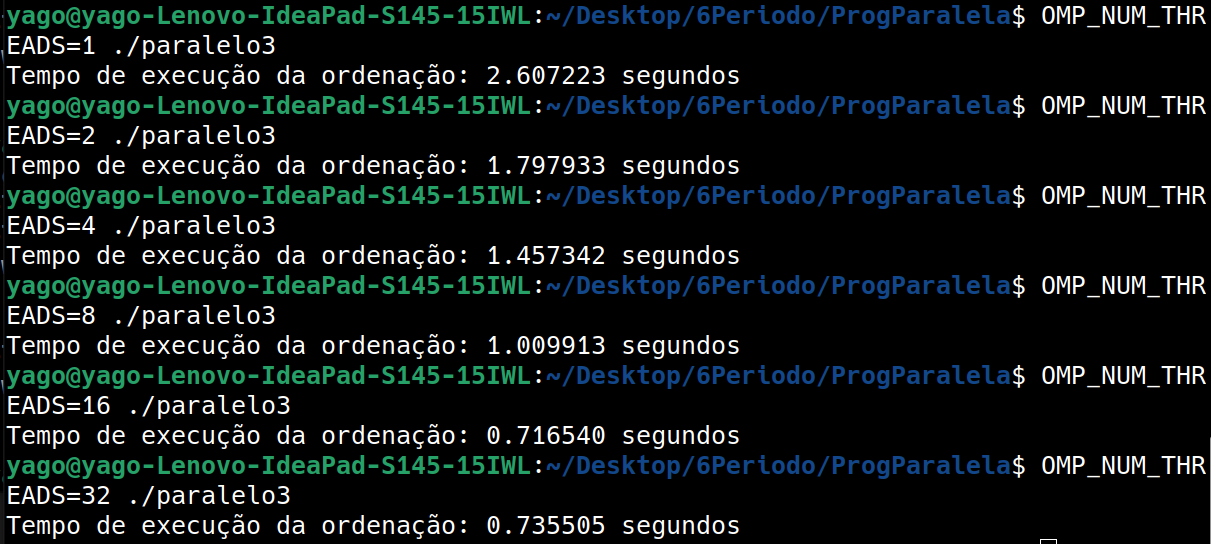

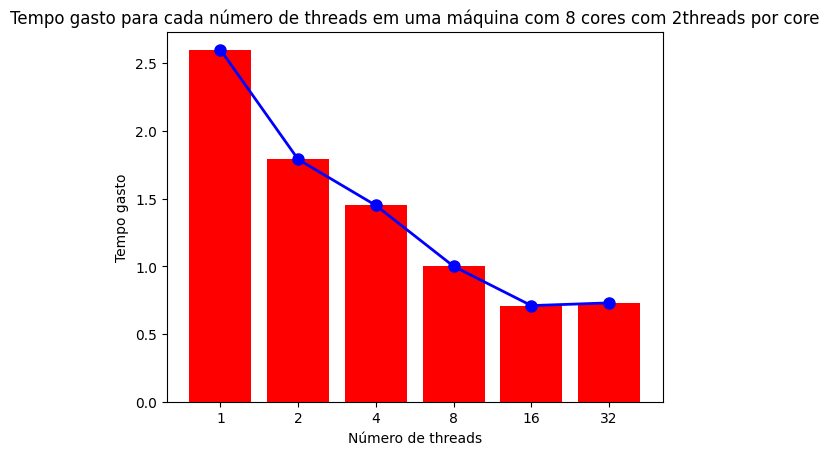

In [ ]:
import matplotlib.pyplot as plt
time = [2.60,1.79,1.45,1,0.71,0.73]
num_thread = ['1','2','4','8','16','32']
plt.bar(num_thread,time,color="red")
plt.plot(num_thread, time, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Número de threads")
plt.ylabel("Tempo gasto")

plt.title("Tempo gasto para cada número de threads em uma máquina com 8 cores com 2threads por core")
plt.show()

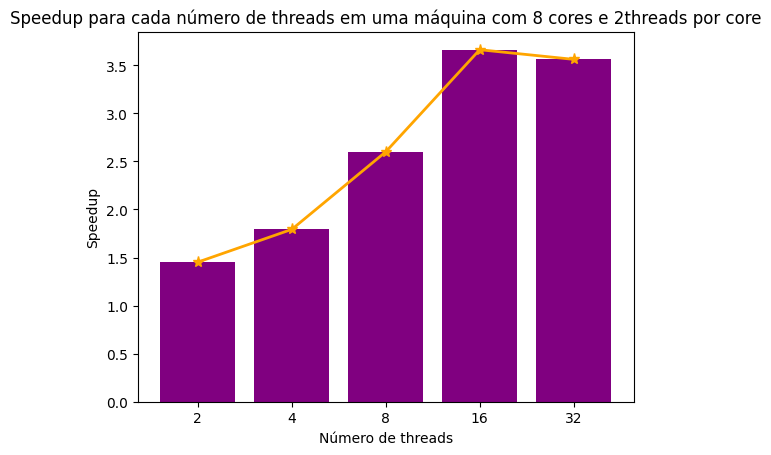

In [ ]:
speedup = [2.60/1.79,2.60/1.45,2.60/1.00,2.60/0.71,2.60/0.73]
#tempo(1)/tempo(n)
num_thread = ['2','4','8','16','32']
plt.bar(num_thread,speedup,color="purple")
plt.plot(num_thread, speedup, color='orange', marker='*', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Número de threads")
plt.ylabel("Speedup")

plt.title("Speedup para cada número de threads em uma máquina com 8 cores e 2threads por core")
plt.show()

## CUDA

In [ ]:
%%writefile sort1.cu
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <math.h>
#include <time.h>
#include <cuda_runtime.h>

#define MAX_STRING_SIZE 8 // 7 caracteres + terminador nulo

__device__ int compare(const char *str1, const char *str2, int size) {
    for (int i = 0; i < size; ++i)
    {
        char c1 = str1[i];
        char c2 = str2[i];

        if (c1 < c2)
            return -1;
        else if (c1 > c2)
            return 1;
    }
    return 0;
}

__device__ void merge(char *data, char *temp, int left, int mid, int right, int size) {
    int i = left;
    int j = mid + 1;
    int k = left;

    while (i <= mid && j <= right) {
        if (compare(data + i * size, data + j * size, size) <= 0) {
            memcpy(temp + k * size, data + i * size, size);
            i++;
        }
        else {
            memcpy(temp + k * size, data + j * size, size);
            j++;
        }
        k++;
    }

    while (i <= mid) {
        memcpy(temp + k * size, data + i * size, size);
        i++;
        k++;
    }

    while (j <= right) {
        memcpy(temp + k * size, data + j * size, size);
        j++;
        k++;
    }

    //for (int x = left; x <= right; x++)
    //    memcpy(data + x * size, temp + x * size, size);
}

__global__ void mergeKernel(char* arr, char* aux, int tamAtual, int num_items, int width) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    int low = idx * width;

    // evitar índices inválidos
    if(low >= num_items - tamAtual || low < 0)
      return;

    int mid = low + tamAtual - 1;
    int high = min(low + width - 1, num_items - 1); // evitar que o high seja maior que o limite superior do vetor

    merge(arr, aux, low, mid, high, MAX_STRING_SIZE);
}

int main(void) {
    int num_items = 0;
    char *h_data = NULL;
    char *d_data = NULL;
    char *auxArr = NULL;

    FILE *file = fopen("quicksort.in", "r");
    if (!file) {
        perror("Error opening file");
        exit(EXIT_FAILURE);
    }

    fscanf(file, "%d", &num_items);

    h_data = (char *)malloc(num_items * MAX_STRING_SIZE);
    if (!h_data) {
        perror("Memory allocation error");
        fclose(file);
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fscanf(file, "%s", h_data + i * MAX_STRING_SIZE);
    fclose(file);

    cudaMalloc((void **)&d_data, num_items * MAX_STRING_SIZE);
    cudaMalloc((void **)&auxArr, num_items * MAX_STRING_SIZE);
    cudaMemcpy(d_data, h_data, num_items * MAX_STRING_SIZE, cudaMemcpyHostToDevice);

    for(int tamAtual = 1; tamAtual < num_items; tamAtual *= 2) {
      int width = tamAtual*2;
      int numSorts = (num_items + width - 1)/width;

      int threadsPerBlock = 64;
      if(numSorts < 32) {
        threadsPerBlock = 2;
      }
      int blocksPerGrid = (numSorts + threadsPerBlock - 1) / threadsPerBlock;
      //printf("numSorts: %d, blocos: %d\n", numSorts, blocksPerGrid);

      //cudaMemcpy(auxArr, d_data, num_items * MAX_STRING_SIZE, cudaMemcpyHostToDevice);
      mergeKernel<<<blocksPerGrid, threadsPerBlock>>>(d_data, auxArr, tamAtual, num_items, width);

      //troca de ponteiros
      char* tmp = d_data;
      d_data = auxArr;
      auxArr = tmp;

      //cudaDeviceSynchronize();
    }

    char *results_h = (char *)malloc(num_items * MAX_STRING_SIZE);
    cudaMemcpy(results_h, d_data, num_items * MAX_STRING_SIZE, cudaMemcpyDeviceToHost);

    FILE *out_file = fopen("quicksort.out", "w");
    if (!out_file) {
        perror("Error opening output file");
        exit(EXIT_FAILURE);
    }

    for (int i = 0; i < num_items; i++)
        fprintf(out_file, "%s\n", results_h + i * MAX_STRING_SIZE);

    fclose(out_file);

    free(h_data);
    free(results_h);
    cudaFree(d_data);
    cudaFree(auxArr);
    cudaDeviceReset();
    exit(EXIT_SUCCESS);
}

Overwriting sort1.cu


In [ ]:
!nvcc sort1.cu -o sort1
!time ./sort1


real	0m12.101s
user	0m11.589s
sys	0m0.317s


In [ ]:
!head -n 10 quicksort.in

10000000
Nmy6qib
ezTG34S
9xPvYMU
j495cX2
CyoAndy
UDZAXlt
Mbmda8Y
OXWZAik
VdCjnRb


In [ ]:
!head -n 10 quicksort.out

0001e2e
0002lhz
0002vBi
0004Axi
0004rjj
0004upu
0006UNu
000744V
000888E
0008p8N


In [ ]:
!nvcc -o sort1 sort1.cu
!nvprof ./sort1


==1913== NVPROF is profiling process 1913, command: ./sort1
==1913== Profiling application: ./sort1
==1913== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.29%  10.2855s        24  428.56ms  3.5676ms  3.35719s  mergeSort(char*, char*, int, int, int)
                    0.54%  56.434ms         1  56.434ms  56.434ms  56.434ms  [CUDA memcpy DtoH]
                    0.16%  16.765ms         1  16.765ms  16.765ms  16.765ms  [CUDA memcpy HtoD]
      API calls:   98.84%  10.3598s         2  5.17989s  16.966ms  10.3428s  cudaMemcpy
                    0.88%  92.015ms         2  46.008ms  155.26us  91.860ms  cudaMalloc
                    0.26%  27.343ms         1  27.343ms  27.343ms  27.343ms  cudaDeviceReset
                    0.01%  1.4081ms         2  704.05us  261.50us  1.1466ms  cudaFree
                    0.00%  392.76us        24  16.364us  3.0280us  298.86us  cudaLaunchKernel
                    0.00%  144.40u